In [1]:
# importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math as math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
# reading the data
df = pd.read_csv('./data/Stock_Price_BRL 2016-2021.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)


            Close_Stock(EUR)  Close_EUR  Close_Stock(BRL)
Date                                                     
2016-01-04         70.580002     4.2891        302.724687
2016-01-05         71.430000     4.3710        312.220530
2016-01-06         72.050003     4.3301        311.983718
2016-01-07         71.339996     4.3322        309.059131
2016-01-08         71.050003     4.4145        313.650238

 Shape of the data:
(1519, 3)


In [3]:
# SMA - Simple Moving Average

df['30_SMA'] = df['Close_Stock(BRL)'].rolling(window = 30, min_periods = 1).mean()
# create 50 days simple moving average column
df['60_SMA'] = df['Close_Stock(BRL)'].rolling(window = 60, min_periods = 1).mean()
# exponential moving average
df['30_EMA'] = df['Close_Stock(BRL)'].ewm(span=30, adjust=False).mean()
df['60_EMA'] = df['Close_Stock(BRL)'].ewm(span=60, adjust=False).mean()
# display first few rows
df.head()

,Close_Stock(EUR),Close_EUR,Close_Stock(BRL),30_SMA,60_SMA,30_EMA,60_EMA
Date,,,,,,,
2016-01-04,70.580002,4.2891,302.724687,302.724687,302.724687,302.724687,302.724687
2016-01-05,71.430000,4.3710,312.220530,307.472608,307.472608,303.337322,303.036026
2016-01-06,72.050003,4.3301,311.983718,308.976312,308.976312,303.895154,303.329393
2016-01-07,71.339996,4.3322,309.059131,308.997016,308.997016,304.228313,303.517253
2016-01-08,71.050003,4.4145,313.650238,309.927661,309.927661,304.836180,303.849482


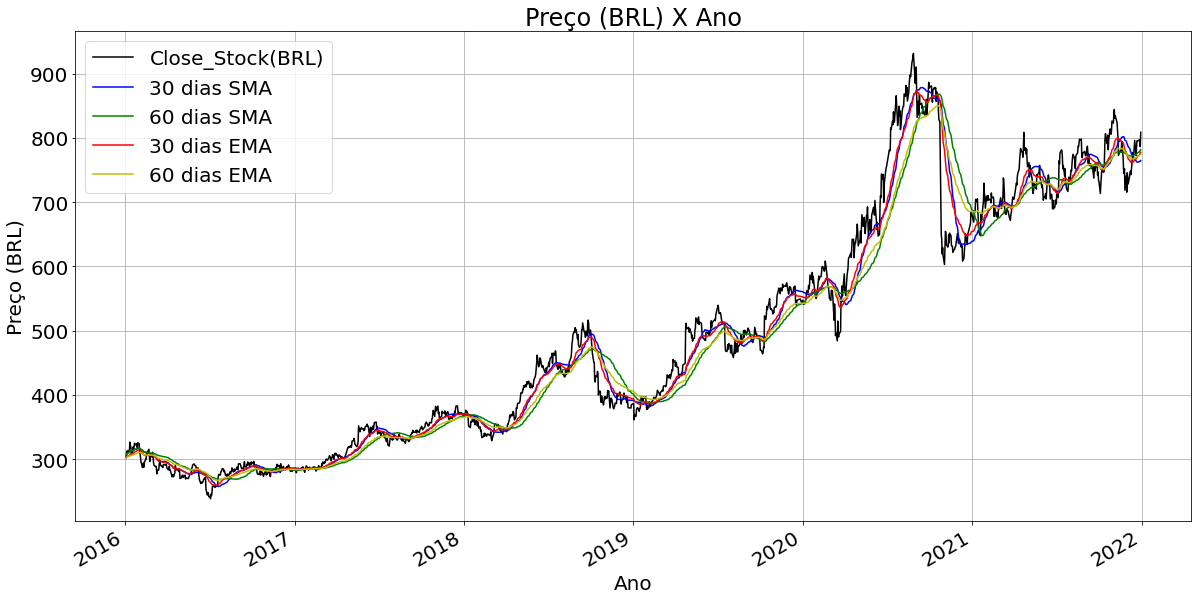

In [4]:
plt.figure(figsize = (20,10))
plt.rcParams['font.size'] = '20'
# plot close price, short-term and long-term moving averages 
df['Close_Stock(BRL)'].plot(color = 'k', label= 'Close_Stock(BRL)') 
df['30_SMA'].plot(color = 'b',label = '30 dias SMA') 
df['60_SMA'].plot(color = 'g', label = '60 dias SMA')
df['30_EMA'].plot(color = 'r',label = '30 dias EMA') 
df['60_EMA'].plot(color = 'y', label = '60 dias EMA')

plt.ylabel('Preço (BRL)')
plt.xlabel('Ano')
plt.title('Preço (BRL) X Ano')
plt.legend()
plt.grid()
plt.savefig('Moving Averages', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [6]:
mse = mean_squared_error(df['Close_Stock(BRL)'], df['30_SMA'])
rmse = math.sqrt(mse)
mape = mean_absolute_percentage_error(df['Close_Stock(BRL)'], df['30_SMA'])
r2 = r2_score(df['Close_Stock(BRL)'], df['30_SMA'])

print(mse)
print(rmse)
print(mape)
print(r2)

997.9579888564122
31.590473071108196
3.9863337668047407
0.9706048423551069


In [7]:
mse = mean_squared_error(df['Close_Stock(BRL)'], df['60_SMA'])
rmse = math.sqrt(mse)
mape = mean_absolute_percentage_error(df['Close_Stock(BRL)'], df['60_SMA'])
r2 = r2_score(df['Close_Stock(BRL)'], df['60_SMA'])

print(mse)
print(rmse)
print(mape)
print(r2)

1973.0796296297747
44.41936097727853
5.700689563677348
0.9418823363242402


In [8]:
mse = mean_squared_error(df['Close_Stock(BRL)'], df['30_EMA'])
rmse = math.sqrt(mse)
mape = mean_absolute_percentage_error(df['Close_Stock(BRL)'], df['30_EMA'])
r2 = r2_score(df['Close_Stock(BRL)'], df['30_EMA'])

print(mse)
print(rmse)
print(mape)
print(r2)

729.8630169918933
27.015977068984444
3.438185691388266
0.9785016617099892


In [9]:
mse = mean_squared_error(df['Close_Stock(BRL)'], df['60_EMA'])
rmse = math.sqrt(mse)
mape = mean_absolute_percentage_error(df['Close_Stock(BRL)'], df['60_EMA'])
r2 = r2_score(df['Close_Stock(BRL)'], df['60_EMA'])

print(mse)
print(rmse)
print(mape)
print(r2)

1424.2033259434568
37.73861849542795
4.836336229076042
0.9580496556448604


In [10]:
final_df = pd.DataFrame(df['2020'])

final_df.head()

C:\Users\I514609\AppData\Local\Temp/ipykernel_75492/646149523.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  final_df = pd.DataFrame(df['2020'])


,Close_Stock(EUR),Close_EUR,Close_Stock(BRL),30_SMA,60_SMA,30_EMA,60_EMA
Date,,,,,,,
2020-01-02,122.000000,4.4883,547.572600,560.508207,542.868699,552.509245,542.763336
2020-01-03,120.459999,4.4920,541.106316,559.665502,544.063956,551.773573,542.709007
2020-01-06,119.559998,4.5338,542.061119,559.002879,545.272875,551.146963,542.687765
2020-01-07,120.099998,4.5434,545.662331,558.112677,546.635407,550.793115,542.785292
2020-01-08,120.820000,4.5322,547.580404,557.451328,547.984655,550.585844,542.942509


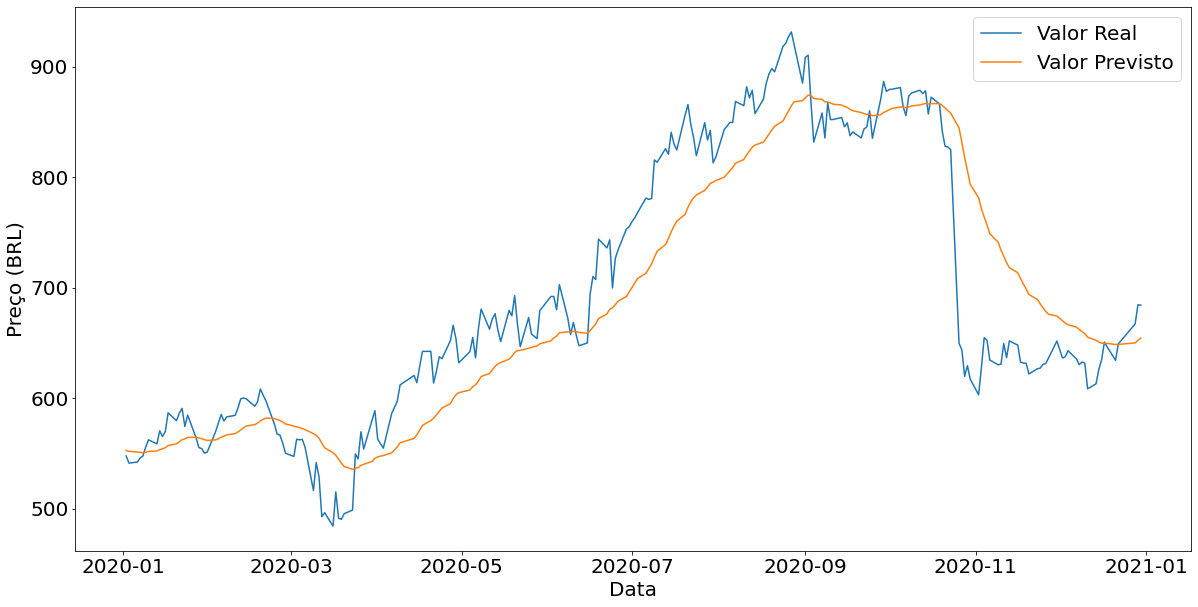

In [11]:
plt.rcParams['font.size'] = '20'
plt.figure(figsize = (20,10))
plt.plot(final_df['Close_Stock(BRL)'], label='Valor Real')
plt.plot(final_df['30_EMA'], label='Valor Previsto')
plt.title("")
plt.xlabel('Data')
plt.ylabel('Preço (BRL)')
plt.legend()
plt.savefig('Moving Average - EMA 2020', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
mse = mean_squared_error(final_df['Close_Stock(BRL)'], final_df['30_EMA'])
rmse = math.sqrt(mse)
mape = mean_absolute_percentage_error(final_df['Close_Stock(BRL)'], final_df['30_EMA'])
r2 = r2_score(final_df['Close_Stock(BRL)'], final_df['30_EMA'])

print(mse)
print(rmse)
print(mape)
print(r2)

2673.5739855829397
51.706614524477814
5.73650277765733
0.8208206819076398


In [33]:
# Get Subset by month
df_january = final_df[final_df.index.month == 1]
df_february = final_df[final_df.index.month == 2]
df_march = final_df[final_df.index.month == 3]
df_april = final_df[final_df.index.month == 4]
df_may = final_df[final_df.index.month == 5]
df_june = final_df[final_df.index.month == 6]
df_july = final_df[final_df.index.month == 7]
df_august = final_df[final_df.index.month == 8]
df_september = final_df[final_df.index.month == 9]
df_october = final_df[final_df.index.month == 10]
df_november = final_df[final_df.index.month == 11]
df_december = final_df[final_df.index.month == 12]

In [34]:
# Print max values by each month
#print(df_january[df_january['30_EMA']==df_january['30_EMA'].max()])
#print(df_february[df_february['30_EMA']==df_february['30_EMA'].max()])
#print(df_march[df_march['30_EMA']==df_march['30_EMA'].max()])
#print(df_april[df_april['30_EMA']==df_april['30_EMA'].max()])
#print(df_may[df_may['30_EMA']==df_may['30_EMA'].max()])
#print(df_june[df_june['30_EMA']==df_june['30_EMA'].max()])
#print(df_july[df_july['30_EMA']==df_july['30_EMA'].max()])
#print(df_august[df_august['30_EMA']==df_august['30_EMA'].max()])
print(df_september[df_september['30_EMA']==df_september['30_EMA'].max()])
print(df_october[df_october['30_EMA']==df_october['30_EMA'].max()])
print(df_november[df_november['30_EMA']==df_november['30_EMA'].max()])
print(df_december[df_december['30_EMA']==df_december['30_EMA'].max()])

            Close_Stock(EUR)  Close_EUR  Close_Stock(BRL)      30_SMA  \
Date                                                                    
2020-09-02             141.5     6.4329         910.25535  872.820026   

                60_SMA      30_EMA      60_EMA  
Date                                            
2020-09-02  818.559515  874.164068  824.812332  
            Close_Stock(EUR)  Close_EUR  Close_Stock(BRL)      30_SMA  \
Date                                                                    
2020-10-14        134.320007     6.5364        877.969294  859.528521   

                60_SMA      30_EMA      60_EMA  
Date                                            
2020-10-14  866.174274  866.676032  848.678828  
            Close_Stock(EUR)  Close_EUR  Close_Stock(BRL)      30_SMA  \
Date                                                                    
2020-11-02             90.18     6.6859        602.934462  814.576119   

                60_SMA      30_EMA      60_EMA